In [1]:
import pandas as pd
df=pd.read_csv('product_sales_data.csv')
print (df)

    Order ID Customer ID     Product     Category Region  Order Date  \
0      O0001        C082      Laptop  Electronics  North  2025-07-09   
1      O0002        C029  Headphones  Electronics  North  2025-06-23   
2      O0003        C076    Backpack  Accessories  North  2025-01-08   
3      O0004        C030      Tablet  Electronics  North  2025-05-24   
4      O0005        C084      Tablet  Electronics   West  2025-02-26   
..       ...         ...         ...          ...    ...         ...   
995    O0996        C013      Tablet  Electronics  North  2025-01-12   
996    O0997        C005      Camera  Electronics  North  2025-05-05   
997    O0998        C005     Monitor  Electronics   West  2025-06-18   
998    O0999        C080     Monitor  Electronics   East  2025-01-13   
999    O1000        C078      Laptop  Electronics  North  2025-02-23   

     Quantity  Unit Price  Total Revenue  
0           3       17049          51147  
1           5        6697          33485  
2     

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order ID       1000 non-null   object
 1   Customer ID    1000 non-null   object
 2   Product        1000 non-null   object
 3   Category       1000 non-null   object
 4   Region         1000 non-null   object
 5   Order Date     1000 non-null   object
 6   Quantity       1000 non-null   int64 
 7   Unit Price     1000 non-null   int64 
 8   Total Revenue  1000 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [3]:
print(df.isnull().sum())

Order ID         0
Customer ID      0
Product          0
Category         0
Region           0
Order Date       0
Quantity         0
Unit Price       0
Total Revenue    0
dtype: int64


In [4]:
print("Duplicated Rows:",df.duplicated().sum())

Duplicated Rows: 0


In [5]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [6]:
print (df.dtypes)

Order ID                 object
Customer ID              object
Product                  object
Category                 object
Region                   object
Order Date       datetime64[ns]
Quantity                  int64
Unit Price                int64
Total Revenue             int64
dtype: object


In [7]:
df['Month']=df['Order Date'].dt.strftime('%B')

In [8]:
monthly_sales=df.groupby('Month')['Total Revenue'].sum().reindex(['January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December']).fillna(0)
print(monthly_sales)

Month
January       9778324.0
February      9939159.0
March        12242986.0
April        11863776.0
May          10859277.0
June         11205830.0
July          9982360.0
August              0.0
September           0.0
October             0.0
November            0.0
December            0.0
Name: Total Revenue, dtype: float64


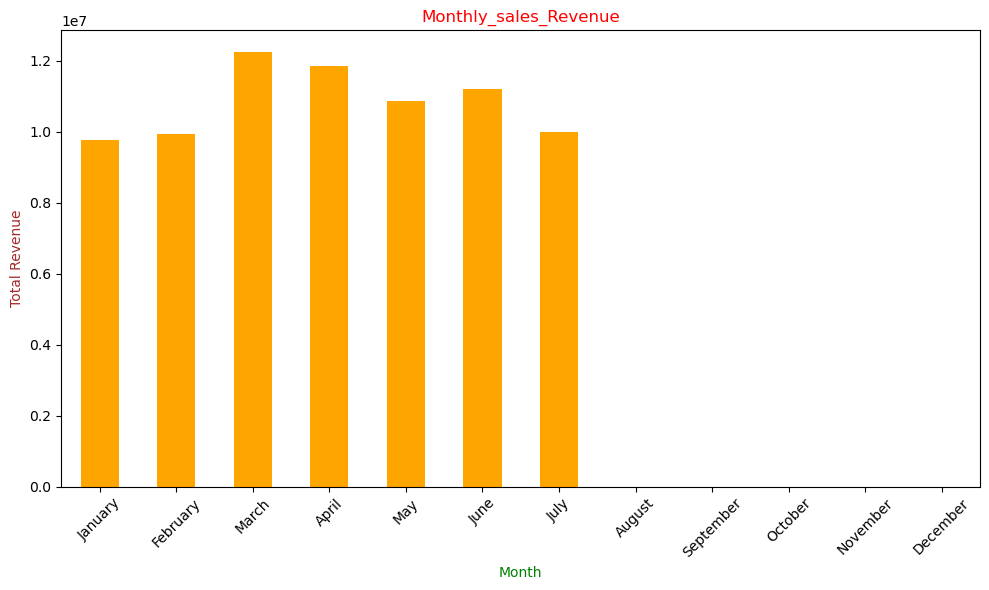

In [9]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='bar',color='orange')
plt.title('Monthly_sales_Revenue',color='red')
plt.xlabel('Month',color='green')
plt.ylabel('Total Revenue',color='brown')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Monthly_sales_revenue.png')
plt.show()
plt.close()

In [10]:
product_revenue=df.groupby('Product')['Total Revenue'].sum().sort_values(ascending=False)
print (product_revenue)

Product
Laptop        9331987
Watch         9228012
Tablet        8093254
Shoes         8034950
Headphones    7871220
T-shirt       7673433
Camera        6790285
Backpack      6601666
Smartphone    6134745
Monitor       6112160
Name: Total Revenue, dtype: int64


In [11]:
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'violet', 'gold', 'tomato', 'turquoise','maroon','lime','aqua']

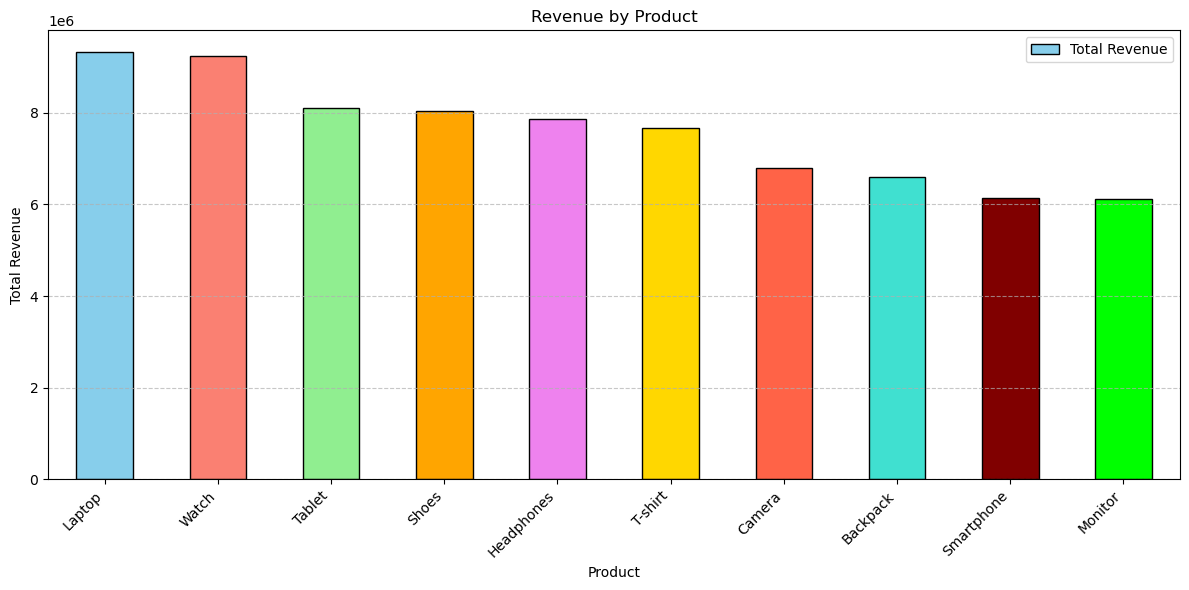

In [12]:
plt.figure(figsize=(12,6))
product_revenue.head(10).plot(kind='bar',color=colors,edgecolor='black')
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.legend()
plt.savefig('Revenue by Product.png')
plt.show()
plt.close()

In [13]:
category_wise_revenue=df.groupby('Category')['Total Revenue'].sum().sort_values(ascending=False)
print (category_wise_revenue)

Category
Electronics    44333651
Accessories    15829678
Apparel        15708383
Name: Total Revenue, dtype: int64


In [14]:
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'violet', 'gold', 'tomato', 'turquoise']

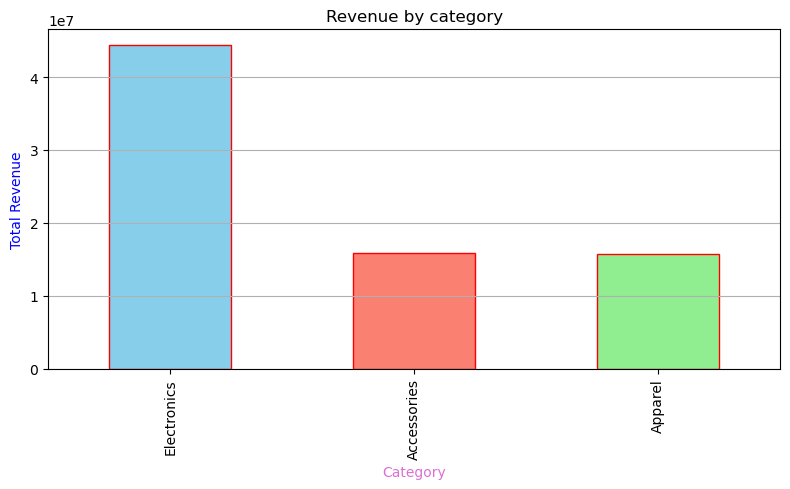

In [15]:
plt.figure(figsize=(8,5))
category_wise_revenue.plot(kind='bar',color=colors,edgecolor='red')
plt.title('Revenue by category')
plt.xlabel('Category',color='orchid')
plt.ylabel('Total Revenue',color='blue')
plt.tight_layout()
plt.grid(axis='y')
plt.savefig('Revenue by category.png')
plt.show()
plt.close()

In [16]:
import random
sellers = ['Seller A', 'Seller B', 'Seller C', 'Seller D', 'Seller E']
df['Seller'] = [random.choice(sellers) for _ in range(len(df))]

In [17]:
seller_revenue=df.groupby('Seller')['Total Revenue'].sum().sort_values(ascending=False)
print (seller_revenue)

Seller
Seller B    16008656
Seller E    15947288
Seller D    15428413
Seller C    14886257
Seller A    13601098
Name: Total Revenue, dtype: int64


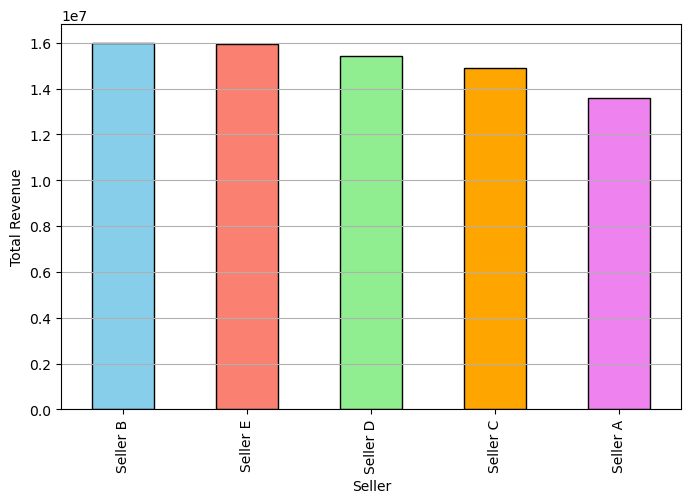

In [18]:
plt.figure(figsize=(8,5))
seller_revenue.plot(kind='bar',color=colors,edgecolor='black')
plt.xlabel('Seller')
plt.ylabel('Total Revenue')
plt.grid(axis='y')
plt.savefig('Seller Revenue.png')
plt.show()
plt.close()
           

In [19]:
print(df[['Product', 'Seller']].head())

      Product    Seller
0      Laptop  Seller E
1  Headphones  Seller B
2    Backpack  Seller C
3      Tablet  Seller B
4      Tablet  Seller D


In [20]:
region_revenue=df.groupby('Region')['Total Revenue'].sum().reset_index()
region_revenue=region_revenue.sort_values(by='Total Revenue',ascending=False)
print(region_revenue)

  Region  Total Revenue
3   West       21003462
0   East       20073517
1  North       17585029
2  South       17209704


In [21]:
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'violet', 'gold', 'tomato', 'turquoise']


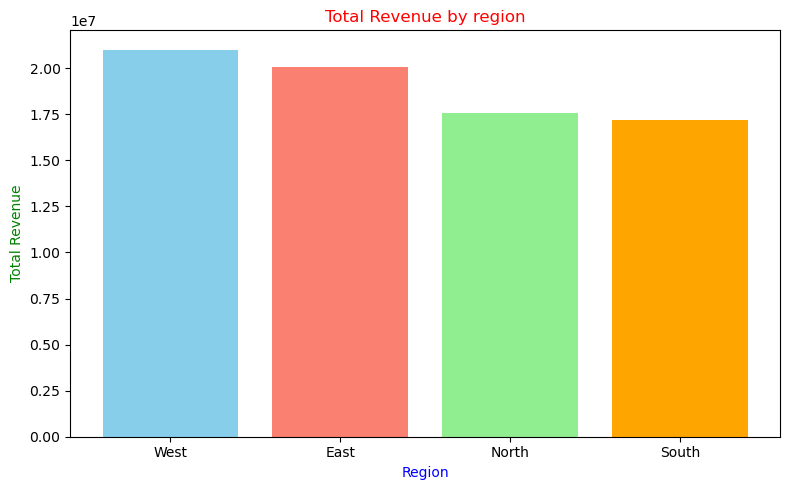

In [22]:
plt.figure(figsize=(8,5))
plt.bar(region_revenue['Region'],region_revenue['Total Revenue'],color=colors)
plt.title('Total Revenue by region',color='red')
plt.xlabel('Region',color='blue')
plt.ylabel('Total Revenue',color='green')
plt.tight_layout()
plt.savefig('total revenue by region.png')
plt.show()
plt.close()


In [23]:
df.columns

Index(['Order ID', 'Customer ID', 'Product', 'Category', 'Region',
       'Order Date', 'Quantity', 'Unit Price', 'Total Revenue', 'Month',
       'Seller'],
      dtype='object')

In [24]:
print(df['Order Date'])

0     2025-07-09
1     2025-06-23
2     2025-01-08
3     2025-05-24
4     2025-02-26
         ...    
995   2025-01-12
996   2025-05-05
997   2025-06-18
998   2025-01-13
999   2025-02-23
Name: Order Date, Length: 1000, dtype: datetime64[ns]


In [25]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Year-Month']=df['Order Date'].dt.to_period('M').astype(str)


In [26]:
monthly_revenue=df.groupby('Year-Month')['Total Revenue'].sum().reset_index()
print (monthly_revenue)

  Year-Month  Total Revenue
0    2025-01        9778324
1    2025-02        9939159
2    2025-03       12242986
3    2025-04       11863776
4    2025-05       10859277
5    2025-06       11205830
6    2025-07        9982360


In [27]:
colors = plt.cm.tab20.colors  
color_map = {month: colors[i % len(colors)] for i, month in enumerate(monthly_revenue['Year-Month'])}

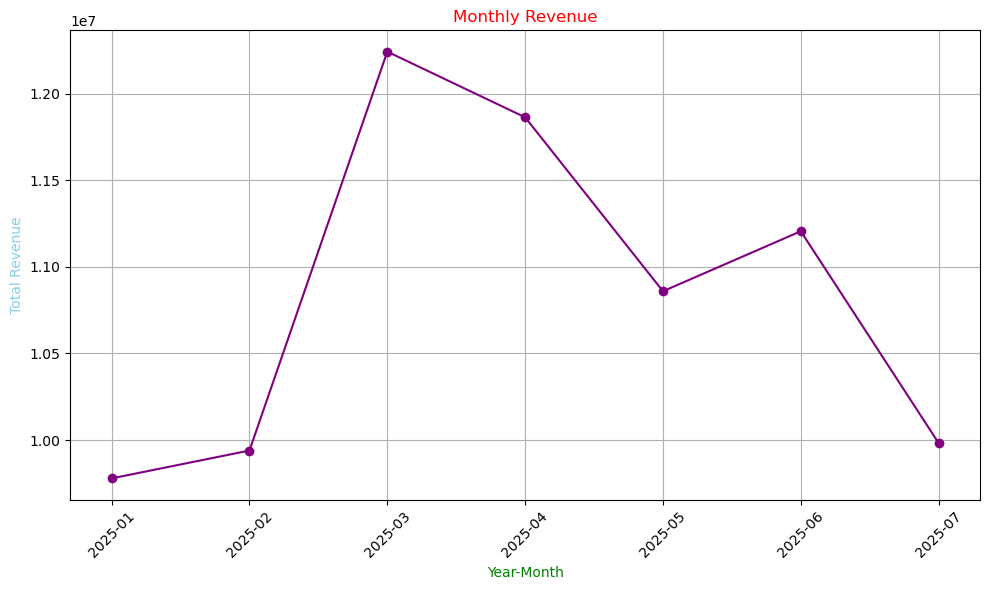

In [28]:
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue['Year-Month'], monthly_revenue['Total Revenue'], marker='o', color='purple')
plt.title('Monthly Revenue',color='red')
plt.xlabel('Year-Month',color='Green')
plt.ylabel('Total Revenue',color='skyblue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.savefig('Monthly Revenue.png')
plt.show()
plt.close()

In [29]:
import numpy as np
top_customers=df.groupby('Customer ID')['Total Revenue'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_customers)

  Customer ID  Total Revenue
0        C093        2128693
1        C084        1527056
2        C058        1483106
3        C069        1443239
4        C039        1384977
5        C018        1300301
6        C043        1266745
7        C095        1247804
8        C030        1242110
9        C070        1214485


In [30]:
colors = plt.cm.tab10(np.linspace(0, 1, len(top_customers))) 

<Figure size 1000x700 with 0 Axes>

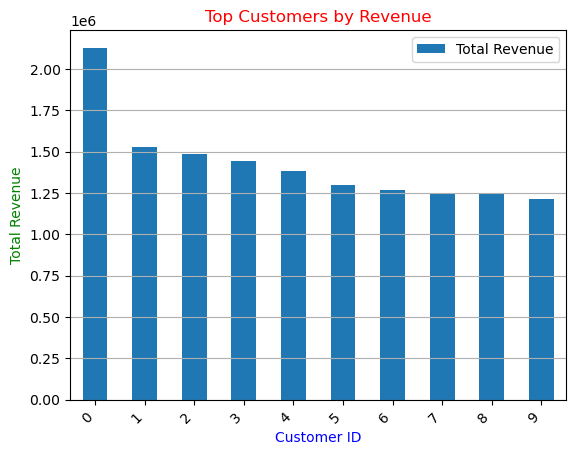

In [31]:
plt.figure(figsize=(10,7))
top_customers.plot(kind='bar',color=colors)
plt.title('Top Customers by Revenue',color='red')
plt.xlabel('Customer ID',color='Blue')
plt.ylabel('Total Revenue',color='green')
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y')
plt.savefig('Top Customers by Revenue.png')
plt.show()
plt.close()



In [32]:
customer_revenue = df.groupby('Customer ID', as_index=False)['Total Revenue'].sum()
print(customer_revenue)

   Customer ID  Total Revenue
0         C001         692479
1         C002        1086963
2         C003         408153
3         C004         726143
4         C005         726625
..         ...            ...
95        C096        1161440
96        C097         925268
97        C098         450468
98        C099         470494
99        C100         354991

[100 rows x 2 columns]


In [33]:
revenue_series = customer_revenue['Total Revenue']

In [34]:
high_threshold=revenue_series.quantile(0.8)
low_threshold=revenue_series.quantile(0.3)
print("High_threshold",high_threshold)
print("Low_threshold",low_threshold)

High_threshold 998373.4
Low_threshold 560029.1


In [35]:
def categorize_customer(revenue):
    if revenue>= high_threshold:
      return "High Spender"
    elif revenue<= low_threshold:
      return "Low Spender"
    else:
      return "Medium Spender"

In [36]:
customer_revenue['Customer Segments']=customer_revenue['Total Revenue'].apply(categorize_customer)
print (customer_revenue.head())

  Customer ID  Total Revenue Customer Segments
0        C001         692479    Medium Spender
1        C002        1086963      High Spender
2        C003         408153       Low Spender
3        C004         726143    Medium Spender
4        C005         726625    Medium Spender


In [37]:
import matplotlib.pyplot as plt
segment_counts=customer_revenue['Customer Segments'].value_counts()
print(segment_counts)

Customer Segments
Medium Spender    50
Low Spender       30
High Spender      20
Name: count, dtype: int64


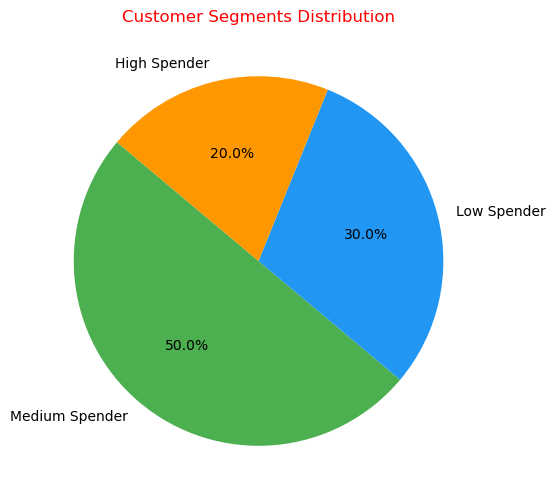

In [38]:
plt.figure(figsize=(6, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#2196F3', '#FF9800'])
plt.title("Customer Segments Distribution",color='red')
plt.savefig('Customer Segments Distribution.png')
plt.show()
plt.close()

In [39]:
segment_revenue= customer_revenue.groupby('Customer Segments')['Total Revenue'].sum()
print (segment_revenue)

Customer Segments
High Spender      24993672
Low Spender       12565468
Medium Spender    38312572
Name: Total Revenue, dtype: int64


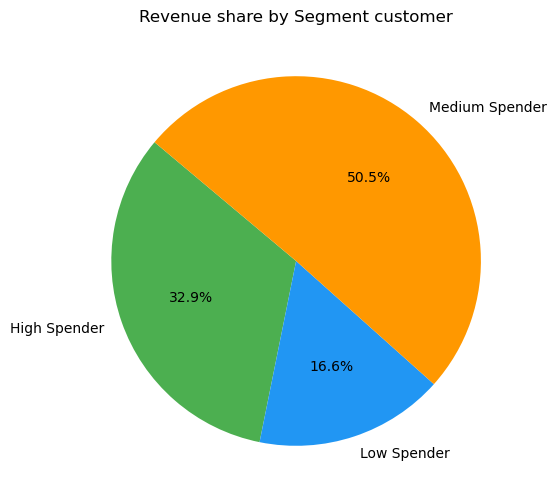

In [40]:
plt.figure(figsize=(6,6))
plt.pie(segment_revenue,labels=segment_revenue.index,autopct='%1.1f%%',startangle=140,colors=['#4CAF50', '#2196F3', '#FF9800'])
plt.title('Revenue share by Segment customer')
plt.savefig('Revenue share by Segment customer.png')
plt.show()
plt.close()

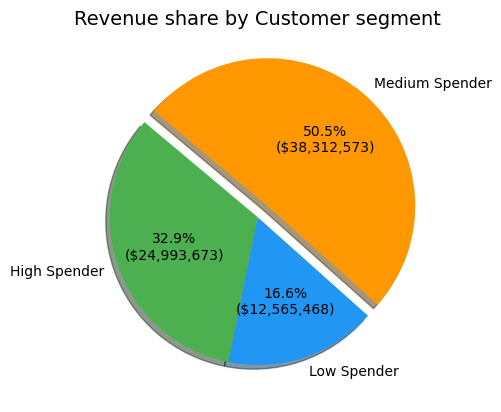

In [41]:
import matplotlib.pyplot as plt
segment_revenue= customer_revenue.groupby('Customer Segments')['Total Revenue'].sum()

max_segment_index=segment_revenue.idxmax()
explode = [0.1 if seg == max_segment_index else 0 for seg in segment_revenue.index]

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f"{pct:.1f}%\n(${val:,})"
    return my_format
 

plt.figure(figure=(6,6))
plt.pie(segment_revenue,labels=segment_revenue.index,autopct=autopct_format(segment_revenue),startangle=140,colors=['#4CAF50', '#2196F3', '#FF9800'],explode=explode,shadow=True)
plt.title('Revenue share by Customer segment',fontsize=14)
plt.savefig('Revenue share by Customer segment.png')
plt.show()
plt.close()

In [42]:
top_customers=customer_revenue.groupby('Customer ID')['Total Revenue'].sum().nlargest(10).reset_index()
print(top_customers)

  Customer ID  Total Revenue
0        C093        2128693
1        C084        1527056
2        C058        1483106
3        C069        1443239
4        C039        1384977
5        C018        1300301
6        C043        1266745
7        C095        1247804
8        C030        1242110
9        C070        1214485


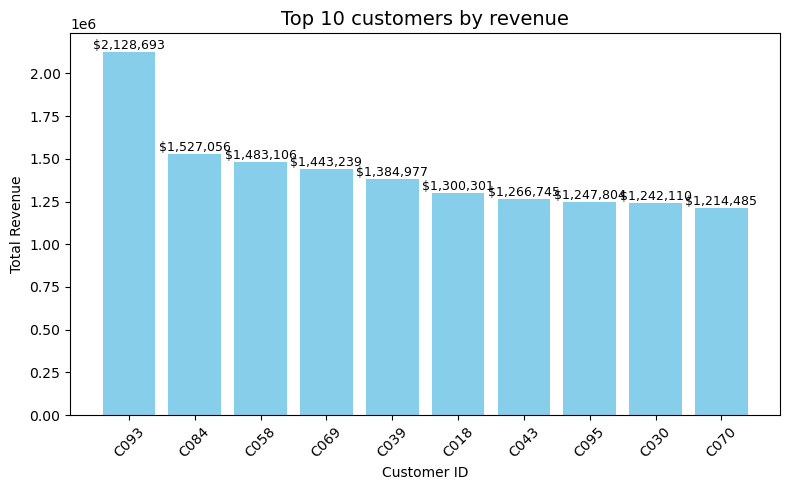

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
bars=plt.bar(top_customers['Customer ID'],top_customers['Total Revenue'],color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"${height:,.0f}", 
             ha='center', va='bottom', fontsize=9)
plt.title('Top 10 customers by revenue',fontsize=14)
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [44]:
top_products=df.groupby('Product')['Total Revenue'].sum().nlargest(10).reset_index()
print(top_products)

      Product  Total Revenue
0      Laptop        9331987
1       Watch        9228012
2      Tablet        8093254
3       Shoes        8034950
4  Headphones        7871220
5     T-shirt        7673433
6      Camera        6790285
7    Backpack        6601666
8  Smartphone        6134745
9     Monitor        6112160


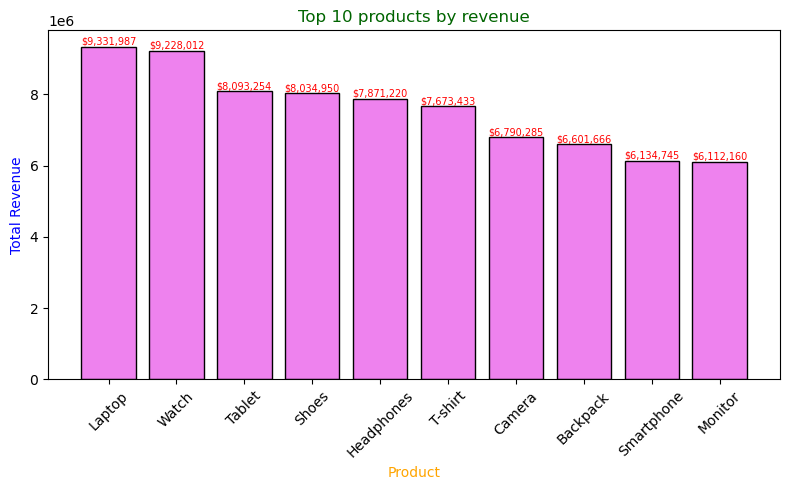

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [45]:
plt.figure(figsize=(8,5))
bars=plt.bar(top_products['Product'],top_products['Total Revenue'],color='violet',edgecolor='black')
for bar in bars:
    height= bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,height,f"${height:,.0f}",ha='center',va='bottom',fontsize=7,color='red')
plt.title('Top 10 products by revenue',color='darkgreen')
plt.xlabel('Product',color='Orange')
plt.ylabel('Total Revenue',color='blue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Top 10 products by revenue.png')
plt.show()
plt

In [46]:
bottom_products=df.groupby('Product')['Total Revenue'].sum().nsmallest(10).reset_index()
print(bottom_products)

      Product  Total Revenue
0     Monitor        6112160
1  Smartphone        6134745
2    Backpack        6601666
3      Camera        6790285
4     T-shirt        7673433
5  Headphones        7871220
6       Shoes        8034950
7      Tablet        8093254
8       Watch        9228012
9      Laptop        9331987


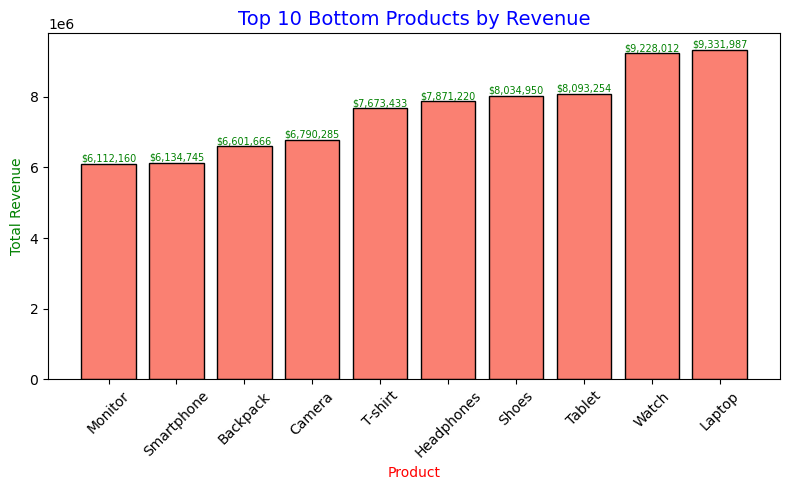

In [47]:
plt.figure(figsize=(8,5))
bars=plt.bar(bottom_products['Product'],bottom_products['Total Revenue'],color='salmon',edgecolor='black')
for bar in bars:
    height=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,height,f"${height:,.0f}",
    ha='center',va='bottom',fontsize=7,color='green')
plt.title('Top 10 Bottom Products by Revenue',fontsize=14,color='blue')
plt.xlabel('Product',color='Red')
plt.ylabel('Total Revenue',color='green')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Top 10 Bottom Products by Revenu.png')
plt.show()
plt.close()

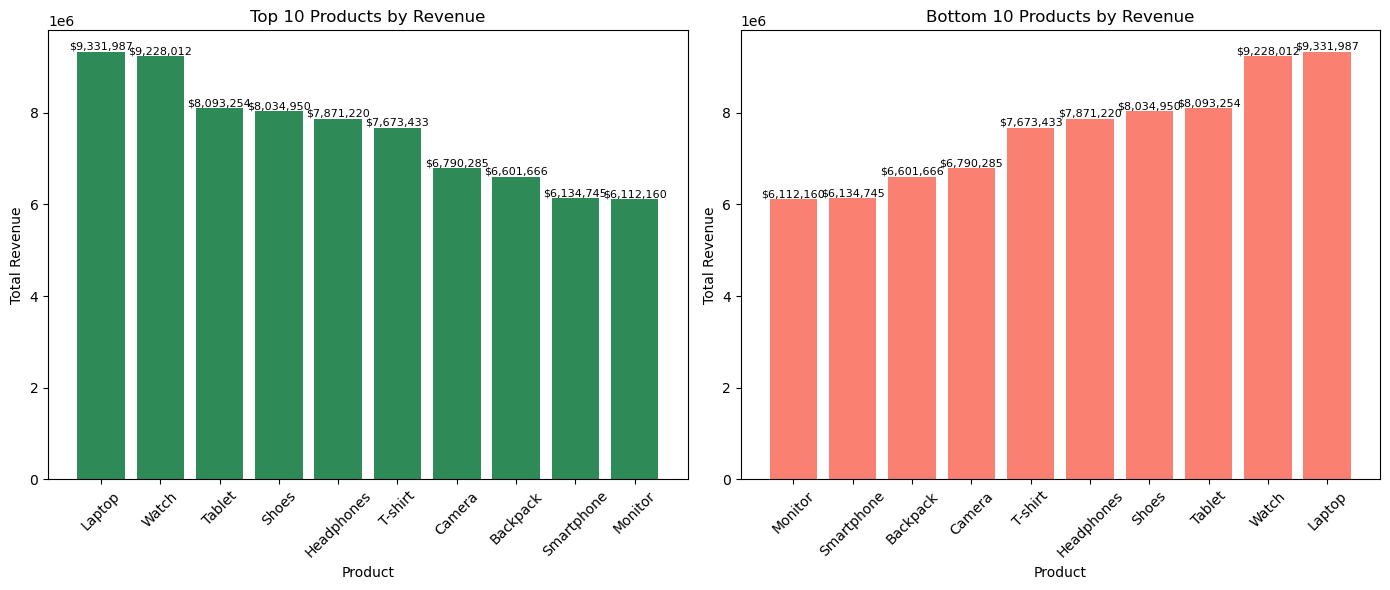

In [48]:
fig,axes=plt.subplots(1,2,figsize=(14,6))
bars1=axes[0].bar(top_products['Product'],top_products['Total Revenue'],color='seagreen')
axes[0].set_title('Top 10 Products by Revenue')
axes[0].set_xlabel('Product')
axes[0].set_ylabel('Total Revenue')
axes[0].tick_params(axis='x',rotation=45)
for bar in bars1:
        height = bar.get_height()
        axes[0].text(bar.get_x()+ bar.get_width()/2,height,f"${height:,.0f}",
        ha='center',va='bottom',fontsize=8)
bars2 = axes[1].bar(bottom_products['Product'], bottom_products['Total Revenue'], color='salmon')
axes[1].set_title("Bottom 10 Products by Revenue")
axes[1].set_xlabel("Product")
axes[1].set_ylabel("Total Revenue")
axes[1].tick_params(axis='x', rotation=45)
for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, height, f"${height:,.0f}", 
                 ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.savefig('Combine top and bottom products.png')
plt.show()
plt.close()

In [49]:
monthly_revenue=df.groupby(pd.Grouper(key='Order Date',freq='ME'))['Total Revenue'].sum().reset_index()
print(monthly_revenue)

  Order Date  Total Revenue
0 2025-01-31        9778324
1 2025-02-28        9939159
2 2025-03-31       12242986
3 2025-04-30       11863776
4 2025-05-31       10859277
5 2025-06-30       11205830
6 2025-07-31        9982360


In [50]:
monthly_revenue['Moving Avg']=monthly_revenue['Total Revenue'].rolling(window=3).mean()
monthly_revenue['Moving Avg']=monthly_revenue['Moving Avg'].fillna(method='bfill')
print(monthly_revenue['Moving Avg'])

0    1.065349e+07
1    1.065349e+07
2    1.065349e+07
3    1.134864e+07
4    1.165535e+07
5    1.130963e+07
6    1.068249e+07
Name: Moving Avg, dtype: float64


C:\Users\kumar\AppData\Local\Temp\ipykernel_3620\3737015945.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_revenue['Moving Avg']=monthly_revenue['Moving Avg'].fillna(method='bfill')


In [51]:
last_date=monthly_revenue['Order Date'].max()
future_dates=pd.date_range(start=last_date + pd.DateOffset(months=1),periods=6,freq='ME')

In [52]:
last_avg = monthly_revenue['Moving Avg'].iloc[-1]
future_revenue = last_avg * 6

In [53]:
future_df=pd.DataFrame({'Order Date':future_dates,'Total Revenue':future_revenue,'Moving Avg':future_revenue})
print (future_df)

  Order Date  Total Revenue  Moving Avg
0 2025-08-31     64094934.0  64094934.0
1 2025-09-30     64094934.0  64094934.0
2 2025-10-31     64094934.0  64094934.0
3 2025-11-30     64094934.0  64094934.0
4 2025-12-31     64094934.0  64094934.0
5 2026-01-31     64094934.0  64094934.0


In [54]:
combined_df=pd.concat([monthly_revenue,future_df])
print(combined_df)

  Order Date  Total Revenue    Moving Avg
0 2025-01-31      9778324.0  1.065349e+07
1 2025-02-28      9939159.0  1.065349e+07
2 2025-03-31     12242986.0  1.065349e+07
3 2025-04-30     11863776.0  1.134864e+07
4 2025-05-31     10859277.0  1.165535e+07
5 2025-06-30     11205830.0  1.130963e+07
6 2025-07-31      9982360.0  1.068249e+07
0 2025-08-31     64094934.0  6.409493e+07
1 2025-09-30     64094934.0  6.409493e+07
2 2025-10-31     64094934.0  6.409493e+07
3 2025-11-30     64094934.0  6.409493e+07
4 2025-12-31     64094934.0  6.409493e+07
5 2026-01-31     64094934.0  6.409493e+07


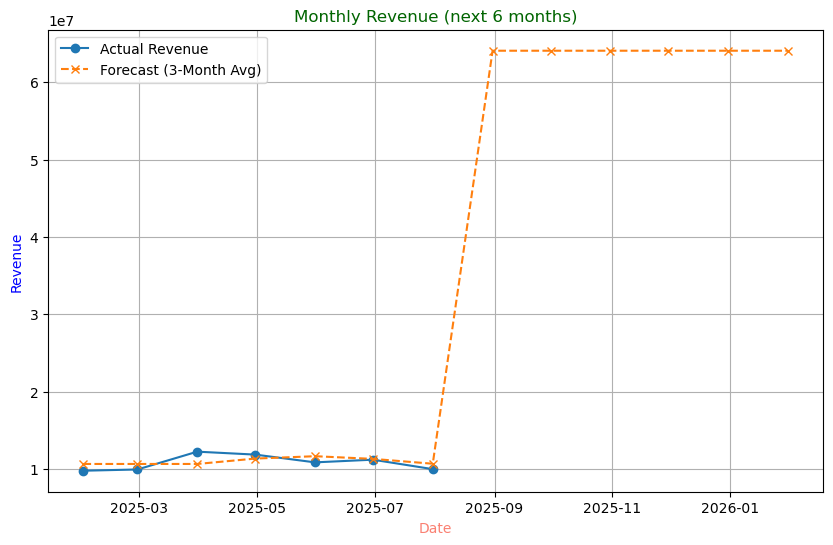

In [55]:
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue['Order Date'],monthly_revenue['Total Revenue'],label='Actual Revenue',marker='o')
plt.plot(combined_df['Order Date'], combined_df['Moving Avg'], label='Forecast (3-Month Avg)', linestyle='--', marker='x')
plt.title('Monthly Revenue (next 6 months)',color='darkgreen')
plt.xlabel('Date',color='salmon')
plt.ylabel('Revenue',color='blue')
plt.legend()
plt.grid(True)
plt.savefig('Monthly Revenue (next 6 months).png')
plt.show()
plt.close()




In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


In [57]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
monthly_revenue = df.groupby(df['Order Date'].dt.to_period('M'))['Total Revenue'].sum()
monthly_revenue.index = monthly_revenue.index.to_timestamp()
monthly_revenue = pd.to_numeric(monthly_revenue, errors='coerce').fillna(0).astype(float)

In [58]:
train = monthly_revenue.iloc[:-6]
test = monthly_revenue.iloc[-6:]

In [59]:
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

In [60]:
forecast = model_fit.forecast(steps=6)
forecast.index = test.index

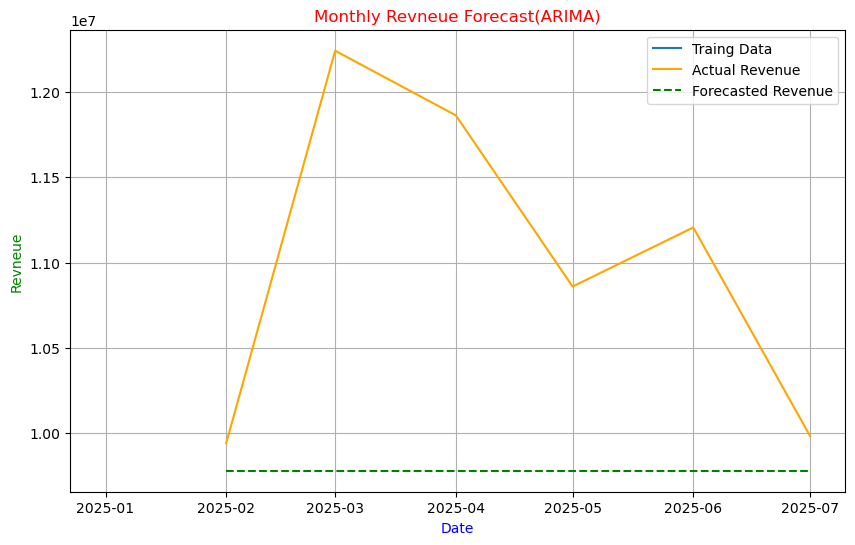

In [61]:
plt.figure(figsize=(10,6))
plt.plot(train, label='Traing Data')
plt.plot(test, label='Actual Revenue',color='orange')
plt.plot(forecast, label='Forecasted Revenue',color='green',linestyle='--')
plt.title('Monthly Revneue Forecast(ARIMA)',color='red')
plt.xlabel('Date',color='blue')
plt.ylabel('Revneue',color='green')
plt.legend()
plt.grid(True)
plt.savefig('Monthly Revneue Forecast(ARIMA).png')
plt.show()
plt.close()

In [62]:
print ("Forcasted Revenue:")
print (forecast)

Forcasted Revenue:
Order Date
2025-02-01    9778324.0
2025-03-01    9778324.0
2025-04-01    9778324.0
2025-05-01    9778324.0
2025-06-01    9778324.0
2025-07-01    9778324.0
Freq: MS, Name: predicted_mean, dtype: float64
